<a href="https://colab.research.google.com/github/Madhuvamsi-iitg/my-projects/blob/main/Hierarchical_clustering_without_ground_truth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df = pd.read_csv('/content/Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [2]:
df.isnull().sum()
#The code df.isnull().sum() is used in Python, particularly with Pandas DataFrames, to count the number of missing or NaN (Not a Number) values in each column of the DataFrame df.

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [3]:
df.describe()
#The df.describe() function in Pandas is used to generate descriptive statistics of a DataFrame (df). It computes various summary statistics for each numerical (or quantifiable) column in the DataFrame.

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


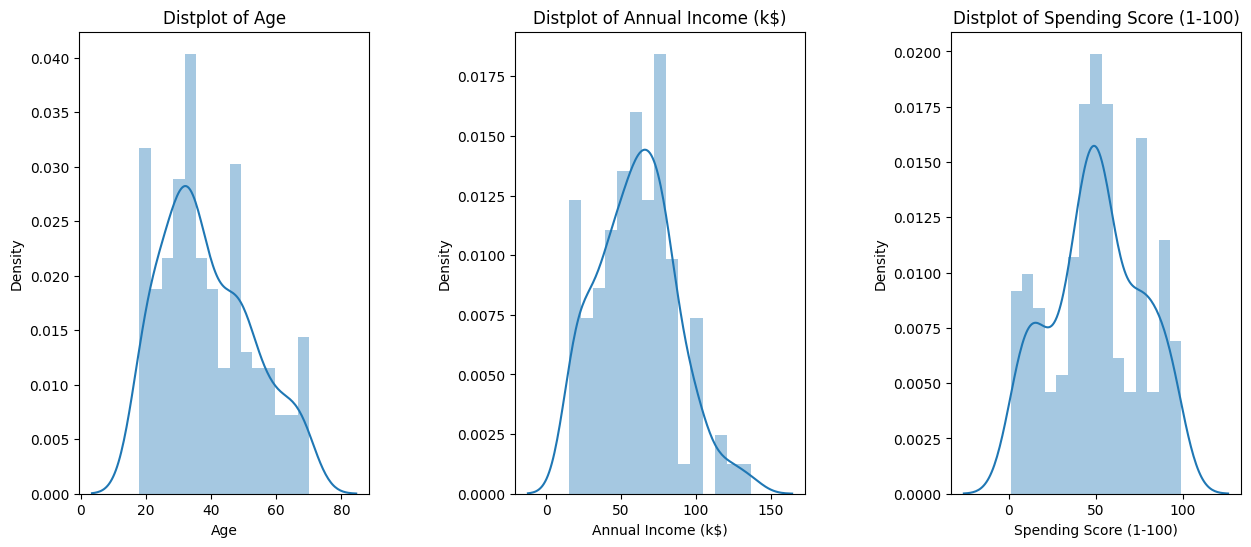

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
import warnings
warnings.filterwarnings('ignore')

plt.figure(1 , figsize = (15 , 6))
n = 0
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 15)
    plt.title('Distplot of {}'.format(x))
plt.show()

This code snippet utilizes Matplotlib and Seaborn to create three subplots displaying the distribution of three different columns ('Age', 'Annual Income (k$)', 'Spending Score (1-100)') from the DataFrame df. Let's break it down:

plt.figure(1, figsize=(15, 6)): This line initializes a new figure for the plot with figure number 1 and sets the figure size to 15 inches in width and 6 inches in height.

n = 0: Initializes a counter variable n to keep track of the subplot number.

plt.subplot(1, 3, n): Divides the plotting area into a 1x3 grid of subplots and selects the nth subplot for plotting. For example, in the first iteration, it selects the first subplot, in the second iteration, it selects the second subplot, and so on.

plt.subplots_adjust(hspace=0.5, wspace=0.5): Adjusts the spacing between subplots horizontally (wspace) and vertically (hspace). This line ensures that there is some space between the subplots.

sns.distplot(df[x], bins=15): Uses Seaborn's distplot function to create a histogram of the column x from the DataFrame df. This function fits a kernel density estimate (KDE) over the histogram. The bins=15 argument specifies the number of bins to use in the histogram.

[7]
0s


In [6]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

df['Gender'] = label_encoder.fit_transform(df['Gender'])
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


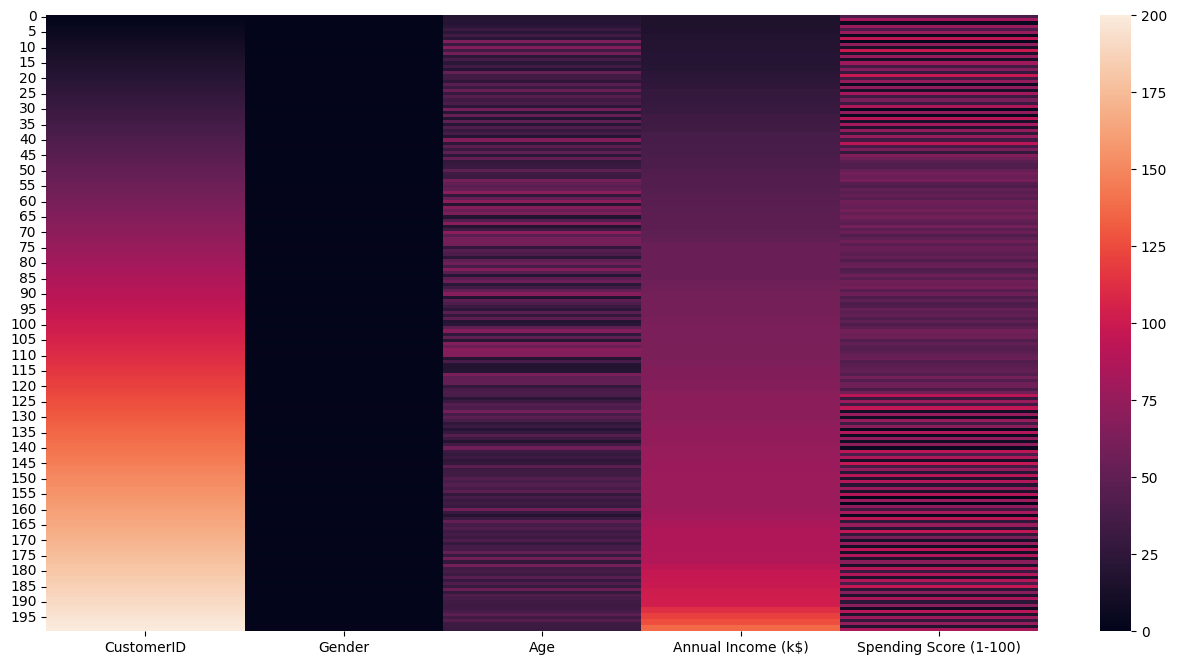

In [7]:
plt.figure(1, figsize = (16 ,8))
sns.heatmap(df)
plt.show()
#A heat map is a data visualization technique that shows magnitude of a phenomenon as color in two dimensions.
#The variation in color may be by hue or intensity, giving obvious visual cues to the reader about how the phenomenon is clustered or varies over space.

In [8]:
from scipy.cluster.hierarchy import dendrogram, linkage

data = df
Z1 = linkage(data, method='single', metric='euclidean')# Min linkage
Z2 = linkage(data, method='complete', metric='euclidean')# Max linkage
Z3 = linkage(data, method='average', metric='euclidean')#Average linkage
Z4 = linkage(data, method='ward', metric='euclidean')# Ward linkage
Z5 = linkage(data, method='centroid', metric='euclidean')# Centroid linkage


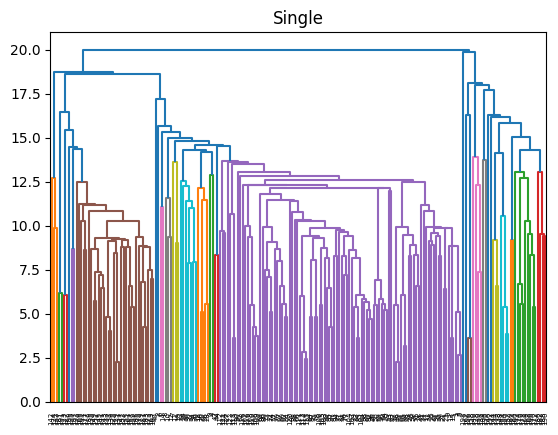

In [9]:
import matplotlib.pyplot as plt

# Single linkage dendogram plot
plt.plot(2,2,1), dendrogram(Z1), plt.title('Single')
plt.show()

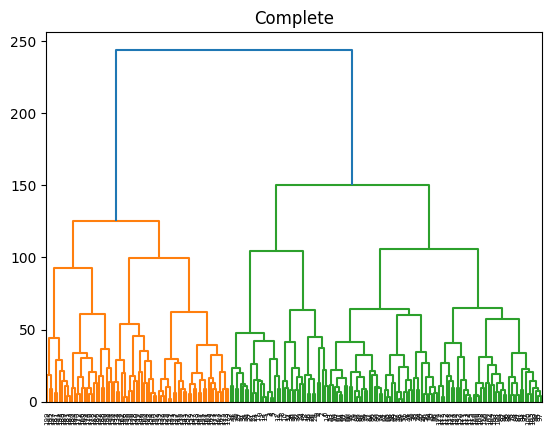

In [10]:
# Complete linkage dendogram plot
plt.plot(2,2,2), dendrogram(Z2), plt.title('Complete')
plt.show()

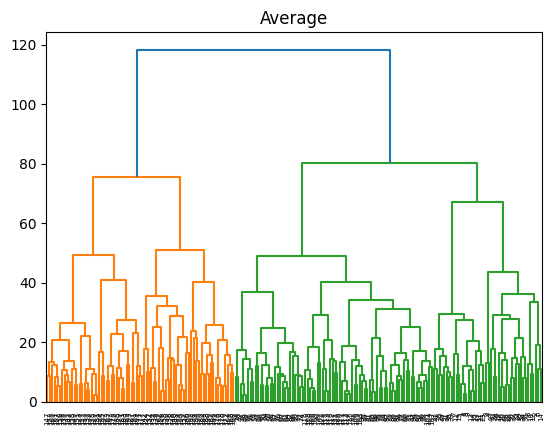

In [11]:
# Complete linkage dendogram plot
plt.plot(2,2,2), dendrogram(Z3), plt.title('Average')
plt.show()

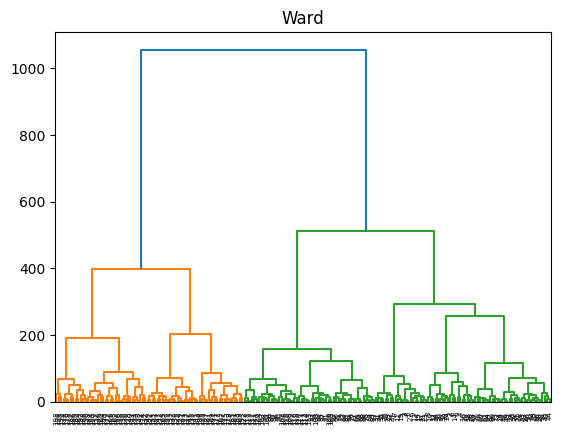

In [12]:
# Complete linkage dendogram plot
plt.plot(2,2,2), dendrogram(Z4), plt.title('Ward')
plt.show()

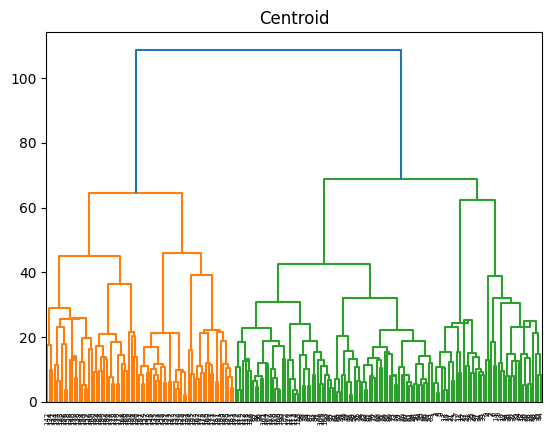

In [13]:
# Complete linkage dendogram plot
plt.plot(2,2,2), dendrogram(Z5), plt.title('Centroid')
plt.show()

Post pruning to get no.of clusters

In [14]:
from scipy.cluster.hierarchy import fcluster

c= fcluster(Z4, 5, criterion='maxclust' )
print(f"clusters:{c}")

clusters:[5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5
 4 5 4 5 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 3 5 5 5 3 3 5 3 3 5 3 5 5
 5 3 3 3 3 3 5 3 5 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 2 1 2 3 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


In [15]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage ='average')

y_hc = hc.fit_predict(df)
y_hc

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 2,
       3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

In [16]:
df['cluster'] = pd.DataFrame(y_hc)

In [17]:
trace1 = go.Scatter3d(
    x= df['Age'],
    y= df['Spending Score (1-100)'],
    z= df['Annual Income (k$)'],
    mode='markers',
     marker=dict(
        color = df['cluster'],
        size= 10,
        line=dict(
            color= df['cluster'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
    title= 'Clusters using Agglomerative Clustering',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)


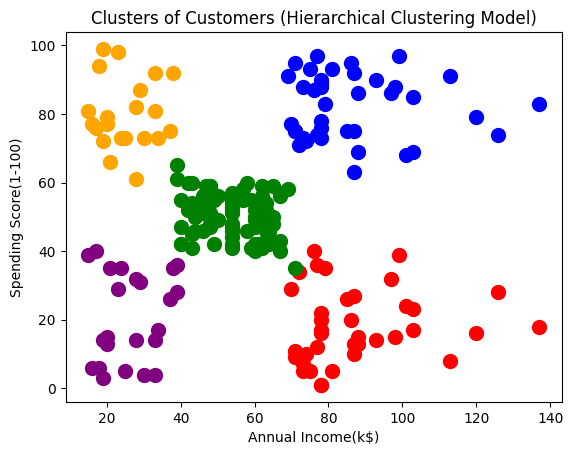

In [18]:
X = df.iloc[:, [3,4]].values
plt.scatter(X[y_hc==0, 0], X[y_hc==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_hc==1, 0], X[y_hc==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_hc==2, 0], X[y_hc==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[y_hc==3, 0], X[y_hc==3, 1], s=100, c='purple', label ='Cluster 4')
plt.scatter(X[y_hc==4, 0], X[y_hc==4, 1], s=100, c='orange', label ='Cluster 5')
plt.title('Clusters of Customers (Hierarchical Clustering Model)')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100)')
plt.show()

**Cluster Analysis**

Green - Low Income, Low Spending

Yellow - Low Income, High Spending

Red - Medium Income, Medium Spending

Purple - High Income, Low Spending

Blue - High Income, High Spending

**Cluster evaluation without ground**

In [19]:
from sklearn import metrics
metrics.silhouette_score(df , c, metric='cosine')

0.4081429573847587

In [20]:
metrics.calinski_harabasz_score(df,c)

239.16947937622265

In [21]:
metrics.davies_bouldin_score(df , c)

0.8796470128253981